In [17]:
import numpy as np
# 从scikit-learn 中导入（cluster）聚类模块；
from sklearn.cluster import KMeans 
# scikit-learn中的度量评价指标模块
from sklearn import metrics
from matplotlib import pyplot as plt
# 用于计算两个输入集合的距离
from scipy.spatial.distance import cdist

In [9]:
# 从一个均匀分布中随机采样， low,high,(维度，此维度下对应的数量)
cluster1 = np.random.uniform(0.5,1.5,(2,10))
cluster1
cluster2 = np.random.uniform(3.5,4.5,(2,10))
cluster2

array([[ 4.42375178,  4.19523955,  3.9306434 ,  3.8702256 ,  4.10866895,
         3.56918041,  4.08203151,  3.7884792 ,  4.4172803 ,  3.73251639],
       [ 3.68282771,  4.28306908,  4.33143124,  3.59288634,  3.80295371,
         3.62099262,  3.65018267,  4.15064841,  4.31154149,  4.03816967]])

In [12]:
# 这个相当于通过两个离群点进行连接，对应列连接,并转置
X = np.hstack((cluster1,cluster2)).T
X

array([[ 1.34684342,  1.08085348],
       [ 0.98035273,  1.19242536],
       [ 1.30901675,  1.27150097],
       [ 0.84991845,  0.58150778],
       [ 0.80490076,  1.07901543],
       [ 1.19186989,  1.44116562],
       [ 1.09229198,  1.39305525],
       [ 1.35257444,  1.37468822],
       [ 1.1853714 ,  1.04278242],
       [ 0.66178577,  1.46575972],
       [ 4.42375178,  3.68282771],
       [ 4.19523955,  4.28306908],
       [ 3.9306434 ,  4.33143124],
       [ 3.8702256 ,  3.59288634],
       [ 4.10866895,  3.80295371],
       [ 3.56918041,  3.62099262],
       [ 4.08203151,  3.65018267],
       [ 3.7884792 ,  4.15064841],
       [ 4.4172803 ,  4.31154149],
       [ 3.73251639,  4.03816967]])

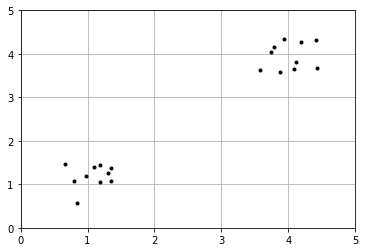

In [15]:
plt.axis([0,5,0,5])
plt.grid(True)
plt.plot(X[:,0],X[:,1],'k.')
# 画图设置x,y轴的显示坐标，可以看到如下图的两簇

In [18]:
K = range(1, 10) # 设置K 聚类的分类数
meandistortions = [] # 存放每个的平均损失

```
Kmeans初始化：返回数据为
sklearn.cluster.KMeans(n_clusters=8,
     init='k-means++', 
    n_init=10, 
    max_iter=300, 
    tol=0.0001, 
    precompute_distances='auto', 
    verbose=0, 
    random_state=None, 
    copy_x=True, 
    n_jobs=1, 
    algorithm='auto'
    )
```
参数的意义：
 - n_clusters:簇的个数，即你想聚成几类
 - init: 初始簇中心的获取方法
 - n_init: 获取初始簇中心的更迭次数
 - max_iter: 最大迭代次数（因为kmeans算法的实现需要迭代）
 - tol: 容忍度，即kmeans运行准则收敛的条件
 - precompute_distances：是否需要提前计算距离
 - verbose: 冗长模式（不太懂是啥意思，反正一般不去改默认值）
 - random_state: 随机生成簇中心的状态条件。
 - copy_x: 对是否修改数据的一个标记，如果True，即复制了就不会修改数据。
 - n_jobs: 并行设置
 - algorithm: kmeans的实现算法，有：'auto', 'full', 'elkan', 其中 'full'表示用EM方式实现
 
 print('kmeans.cluster_centers_',kmeans.cluster_centers_) # 返回聚类中心点的向量矩阵（坐标）
 print('kmeans.labels_',kmeans.labels_) # 表明是K类中第几个聚类
 print('kmeans.inertia_',kmeans.inertia_) # 代表聚类中心均值向量的总和，#用来评估簇的个数是否合适，距离越小说明簇分的越好，选取临界点的簇个
 print('kmeans.n_iter_',kmeans.n_iter_)  # 聚类完成迭代次数


 ```cdist(XA, XB, metric='euclidean', *args, **kwargs)、```
 - 该函数用于计算两个输入集合的距离，通过metric参数指定计算距离的不同方式得到不同的距离度量值metric的取值(22种公有)如下：
 - chebyshev：切比雪夫距离
 - correlation：相关系数
 - euclidean：欧式距离
 - hamming：汉明距离
 - jaccard：杰卡德相似系数
 - mahalanobis：马氏距离
 - minkowski：闵可夫斯基距离
 - seuclidean：标准化欧式距离

In [29]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
# kmeans.cluster_centers_ 的值为：[ 1.07749256  1.19227542],[ 4.01180171  3.94647029]
cdist(X, kmeans.cluster_centers_, 'euclidean') # 每一列是一个点到两个中心的分别欧式距离

array([[ 0.29148711,  3.91328027],
       [ 0.09713995,  4.0956619 ],
       [ 0.24470419,  3.80269739],
       [ 0.65178761,  4.61741036],
       [ 0.29518488,  4.30191947],
       [ 0.27391331,  3.77207728],
       [ 0.20132452,  3.87859065],
       [ 0.33006737,  3.69939897],
       [ 0.18435293,  4.05217369],
       [ 0.49760003,  4.16851673],
       [ 4.17136686,  0.48909127],
       [ 4.39014256,  0.38333821],
       [ 4.24202416,  0.39342293],
       [ 3.68270154,  0.38087453],
       [ 4.0004589 ,  0.17314812],
       [ 3.47953669,  0.54940816],
       [ 3.88182461,  0.30449726],
       [ 4.01265739,  0.30259155],
       [ 4.56990185,  0.54560963],
       [ 3.89207728,  0.29395419]])

In [33]:
np.min([[1,2],[3,4]],axis=0)
X.shape[0]

20

In [35]:
for k in K: # 对每一个分类值进行循环实验
    kmeans = KMeans(n_clusters=k) # 使用KMeans算法进行,生成KMeans对象
    kmeans.fit(X) # 聚类内容拟合，这一步调用会得到cluster_centers_，labels_，inertia_，n_iter_四个数据
    # X样本点，中心点，使用欧式距离进行计算；np.min(距离, axis=1) 找到每一个行中最小，求和，最后X.shape[0] 为20这样求的最小距离平均。总体损失最小
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

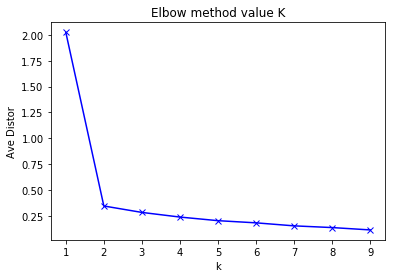

In [37]:
plt.plot(K,meandistortions,'bx-') # 通过总体损失最小和对应的K值画出肘部趋势线
plt.xlabel('k')
plt.ylabel('Ave Distor')
plt.title('Elbow method value K')
plt.show()